## **Instalando a biblioteca**

In [ ]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 kB 16.3 MB/s eta 0:00:00


## **Importando a biblioteca PIL** (Python Imaging Library) para manipular imagens

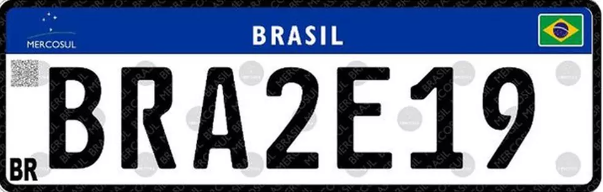

In [ ]:
import PIL
from PIL import ImageDraw
im = PIL.Image.open("/home/placa.png")
im

## **Importando a biblioteca para reconhecer caracteres em imagens e instanciando o leitor de imagens**

In [ ]:
import easyocr
reader = easyocr.Reader(['pt','en']) #catacteres português e inglês

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

/usr/local/lib/python3.10/dist-packages/easyocr/detection.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.load(trained_model, ma

## **Efetuando o Reconhecimento Ótico de Caracteres (OCR) e recebendo as delimitações dos pixels da imagem**



In [ ]:
bounds = reader.readtext('/home/placa.png')
for palavra in bounds:
  print(palavra)


([[25, 39], [79, 39], [79, 51], [25, 51]], 'MeRCOSUL', 0.18622196185044232)
([[248, 20], [348, 20], [348, 52], [248, 52]], 'BRASIL', 0.9973356574598138)
([[4, 154], [42, 154], [42, 186], [4, 186]], 'BR', 0.9990548102380822)
([[42, 54], [551, 54], [551, 183], [42, 183]], 'BRA2E19', 0.8241697560770749)


## **Observe que temos uma lista contendo TUPLAS no retorno:**

Cada tupla representa UM(A) caracter/palavra reconhecido(a).

Os parâmetros da tupla são:
*   1º Uma lista de listas que contém os pontos (x,y) do retângulo que delimita a imagem do caracter
*   2º Caracter reconhecido
*   3º Percentual de confiança

In [ ]:
for tupla in bounds:
  #print(bounds)
  if 'BRASIL' in tupla[1].upper():
    print("Placa do Brasil")

Placa do Brasil


## **Desenhando um retângulo ao redor do caracter reconhecido**

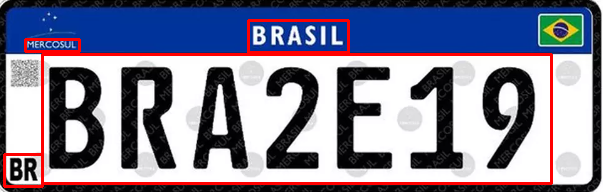

In [ ]:
def desenhar_retangulo(imagem, limites, cor='yellow', largura=2):
    desenho = ImageDraw.Draw(imagem)
    for lista in limites:#lista[0] = [[220, 22], [308, 22], [308, 48], [220, 8]]
        p0, p1, p2, p3 = lista[0]
        desenho.line([*p0, *p1, *p2, *p3, *p0], fill=cor, width=largura)
    return imagem

#chamando a função...
desenhar_retangulo(im, bounds, 'red', 3)

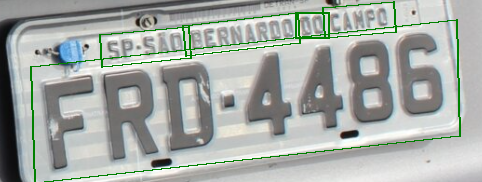

In [ ]:
bounds = reader.readtext('/home/placa2.PNG')
imagem = PIL.Image.open("/home/placa2.PNG")
desenhar_retangulo(imagem, bounds, 'green')

In [ ]:
print(bounds)

[([[296, 12], [328, 12], [328, 38], [296, 38]], '@o', 0.2280910926324672), ([[323.65835921350015, 7.316718427000252], [393.640066518009, 1.5752021966300607], [395.34164078649985, 32.683281572999746], [325.359933481991, 38.42479780336994]], 'Canfc', 0.38075170333966857), ([[183.17086771745093, 25.6221280326862], [297.79799085173255, 12.917758255461928], [299.8291322825491, 43.3778719673138], [186.20200914826742, 56.082241744538074]], 'EERNARDO', 0.6532727162511839), ([[100.97191949374643, 34.55226313936892], [188.60466696696736, 26.26610956019292], [190.0280805062536, 58.44773686063108], [102.39533303303264, 67.73389043980708]], 'SP-Sao', 0.3160772389964501), ([[31.828811074756107, 66.36388762145125], [456.05055029691937, 19.93214671210999], [459.1711889252439, 136.63611237854875], [35.949449703080624, 183.06785328789002]], 'FRD-44.86', 0.7780894290108676)]


In [ ]:
for tupla in bounds:
  print(tupla[1])